In [15]:
import pandas as pd 

In [16]:
%pwd

'e:\\GAN for Face expression Classification\\final deployment'

In [17]:
import pandas as pd

# Load the first CSV file
face_emotions = pd.read_csv(r'E:\GAN for Face expression Classification\final deployment\face_emotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Load the second CSV file
voice_emotions = pd.read_csv(r'E:\GAN for Face expression Classification\final deployment\voiceemotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)


C:\Users\karti\AppData\Local\Temp\ipykernel_26468\3532732736.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  face_emotions = pd.read_csv(r'E:\GAN for Face expression Classification\final deployment\face_emotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)
C:\Users\karti\AppData\Local\Temp\ipykernel_26468\3532732736.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  voice_emotions = pd.read_csv(r'E:\GAN for Face expression Classification\final deployment\voiceemotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [18]:
print(face_emotions)

                    time face_emotion
0    2024-04-25 04:22:15        happy
1    2024-04-25 04:22:16         fear
2    2024-04-25 04:22:17         fear
3    2024-04-25 04:22:18      neutral
4    2024-04-25 04:22:22     surprise
..                   ...          ...
254  2024-04-25 04:27:09        happy
255  2024-04-25 04:27:09      neutral
256  2024-04-25 04:27:09         fear
257  2024-04-25 04:27:10          sad
258  2024-04-25 04:27:11          sad

[259 rows x 2 columns]


In [19]:
print(voice_emotions)

                   time voice emotion
0   2024-04-25 04:22:25           sad
1   2024-04-25 04:22:34          fear
2   2024-04-25 04:22:42       disgust
3   2024-04-25 04:22:50         happy
4   2024-04-25 04:22:58       disgust
5   2024-04-25 04:23:07         happy
6   2024-04-25 04:23:15         happy
7   2024-04-25 04:23:23         happy
8   2024-04-25 04:23:31         happy
9   2024-04-25 04:23:39           sad
10  2024-04-25 04:23:48          fear
11  2024-04-25 04:23:56         happy
12  2024-04-25 04:24:04       disgust
13  2024-04-25 04:24:12          fear
14  2024-04-25 04:24:21         happy
15  2024-04-25 04:24:29         happy
16  2024-04-25 04:24:37          fear
17  2024-04-25 04:24:45         happy
18  2024-04-25 04:24:53       disgust
19  2024-04-25 04:25:02       disgust
20  2024-04-25 04:25:10       disgust
21  2024-04-25 04:25:18           sad
22  2024-04-25 04:25:26         happy
23  2024-04-25 04:25:34           sad
24  2024-04-25 04:25:43         happy
25  2024-04-

In [20]:
# Merge the DataFrames based on time
merged_df = pd.merge(face_emotions, voice_emotions, on='time', how='outer')

# Set 'time' column as index
merged_df.set_index('time', inplace=True)


# Display head of merged DataFrame
print("\nMerged DataFrame:")
print(merged_df)



Merged DataFrame:
                    face_emotion voice emotion
time                                          
2024-04-25 04:22:15        happy           NaN
2024-04-25 04:22:16         fear           NaN
2024-04-25 04:22:17         fear           NaN
2024-04-25 04:22:18      neutral           NaN
2024-04-25 04:22:22     surprise           NaN
...                          ...           ...
2024-04-25 04:27:38          NaN       disgust
2024-04-25 04:27:46          NaN       disgust
2024-04-25 04:27:54          NaN          fear
2024-04-25 04:28:02          NaN         happy
2024-04-25 04:28:10          NaN         happy

[273 rows x 2 columns]


In [21]:
# Fill NaN values with a placeholder, limit to one consecutive NaN value
merged_df_filled = merged_df.fillna(method='ffill', limit=1)

# Reset index
merged_df_filled.reset_index(inplace=True)

# Display head of merged DataFrame after filling NaNs
print("\nMerged DataFrame with limited consecutive NaNs:")
print(merged_df_filled)


Merged DataFrame with limited consecutive NaNs:
                    time face_emotion voice emotion
0    2024-04-25 04:22:15        happy           NaN
1    2024-04-25 04:22:16         fear           NaN
2    2024-04-25 04:22:17         fear           NaN
3    2024-04-25 04:22:18      neutral           NaN
4    2024-04-25 04:22:22     surprise           NaN
..                   ...          ...           ...
268  2024-04-25 04:27:38          NaN       disgust
269  2024-04-25 04:27:46          NaN       disgust
270  2024-04-25 04:27:54          NaN          fear
271  2024-04-25 04:28:02          NaN         happy
272  2024-04-25 04:28:10          NaN         happy

[273 rows x 3 columns]


C:\Users\karti\AppData\Local\Temp\ipykernel_26468\2794070047.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df_filled = merged_df.fillna(method='ffill', limit=1)


In [22]:
merged_df_filled.columns

Index(['time', 'face_emotion', 'voice emotion'], dtype='object')

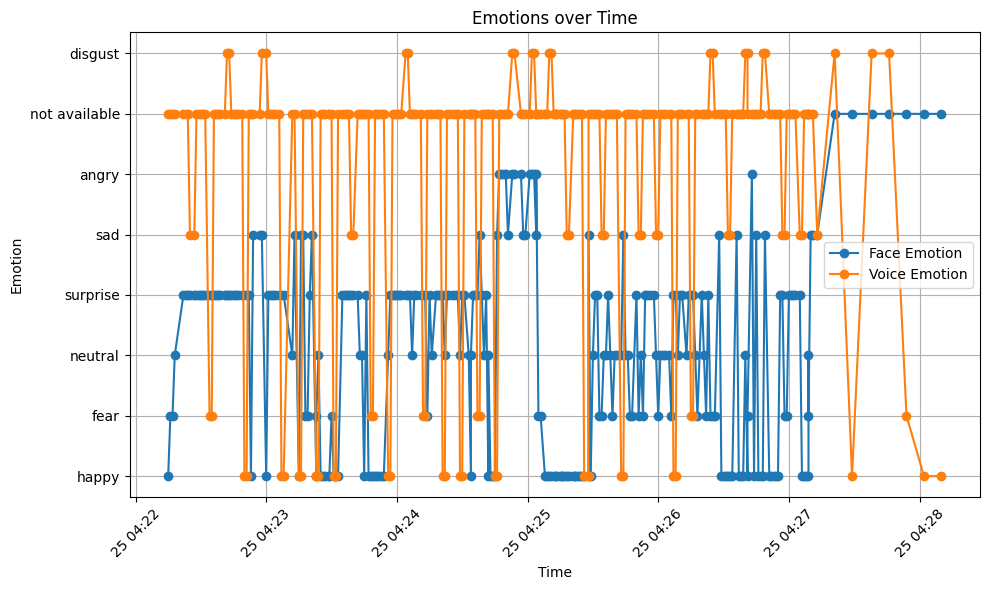

In [23]:
import matplotlib.pyplot as plt

# Convert 'time' column to datetime format
merged_df_filled['time'] = pd.to_datetime(merged_df_filled['time'])

# Set 'time' column as index
merged_df_filled.set_index('time', inplace=True)

# Fill NaN values with a placeholder
merged_df_filled = merged_df_filled.fillna('not available')

# Plot emotions over time
plt.figure(figsize=(10, 6))
plt.plot(merged_df_filled.index, merged_df_filled['face_emotion'], label='Face Emotion', marker='o')
plt.plot(merged_df_filled.index, merged_df_filled['voice emotion'], label='Voice Emotion', marker='o')
plt.xlabel('Time')
plt.ylabel('Emotion')
plt.title('Emotions over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
print(merged_df_filled)


                      face_emotion  voice emotion
time                                             
2024-04-25 04:22:15          happy  not available
2024-04-25 04:22:16           fear  not available
2024-04-25 04:22:17           fear  not available
2024-04-25 04:22:18        neutral  not available
2024-04-25 04:22:22       surprise  not available
...                            ...            ...
2024-04-25 04:27:38  not available        disgust
2024-04-25 04:27:46  not available        disgust
2024-04-25 04:27:54  not available           fear
2024-04-25 04:28:02  not available          happy
2024-04-25 04:28:10  not available          happy

[273 rows x 2 columns]


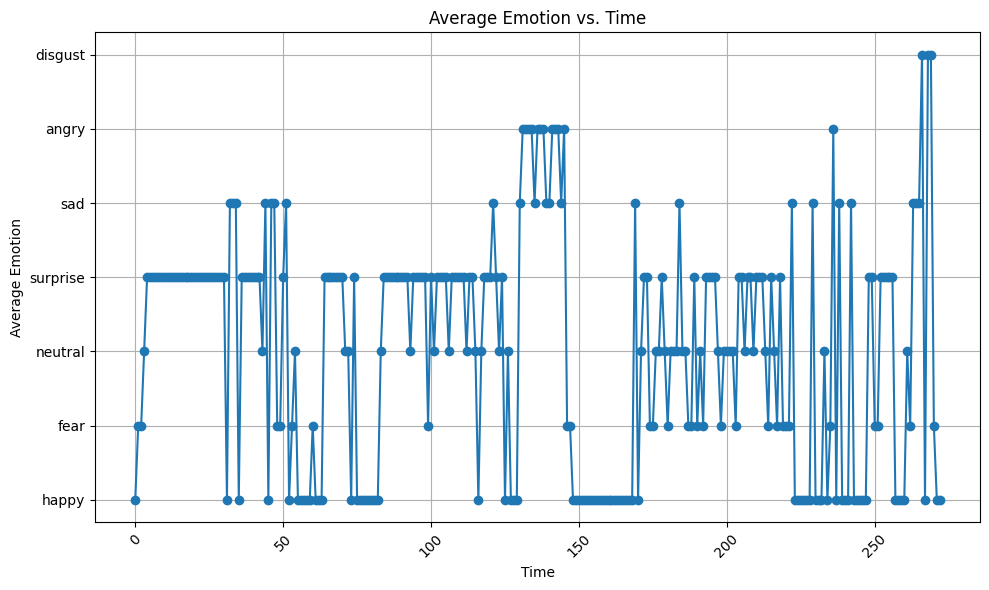

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the function to calculate average emotion
def calculate_average_emotion(row):
    face_emotion = row['face_emotion']
    voice_emotion = row['voice emotion']

    # If both face and voice emotions are NaN, return NaN
    if face_emotion == "not available" and voice_emotion == "not available":
        return "not available"

    # If face emotion is NaN or voice emotion is NaN, use the other value
    elif face_emotion == "not available":
        return voice_emotion

    elif voice_emotion == "not available":
        return face_emotion

    # If both face and voice emotions are available, use only face emotion
    else:
        return face_emotion

merged_df_filled.reset_index(inplace=True)
# Apply the function to calculate average emotion for each row
merged_df_filled['average_emotion'] = merged_df_filled.apply(calculate_average_emotion, axis=1)

# Plot emotion vs. time graph
plt.figure(figsize=(10, 6))
plt.plot(merged_df_filled.index, merged_df_filled['average_emotion'], marker='o')
plt.xlabel('Time')
plt.ylabel('Average Emotion')
plt.title('Average Emotion vs. Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
df = merged_df_filled

df

,time,face_emotion,voice emotion,average_emotion
0,2024-04-25 04:22:15,happy,not available,happy
1,2024-04-25 04:22:16,fear,not available,fear
2,2024-04-25 04:22:17,fear,not available,fear
3,2024-04-25 04:22:18,neutral,not available,neutral
4,2024-04-25 04:22:22,surprise,not available,surprise
...,...,...,...,...
268,2024-04-25 04:27:38,not available,disgust,disgust
269,2024-04-25 04:27:46,not available,disgust,disgust
270,2024-04-25 04:27:54,not available,fear,fear
271,2024-04-25 04:28:02,not available,happy,happy


In [27]:
import pandas as pd
from statistics import mode

# Calculate mode of the average_emotion column
mode_emotion = mode(df['average_emotion'])

print("Mode emotion:", mode_emotion)


Mode emotion: surprise


In [28]:
import pandas as pd
from collections import Counter

# Calculate mode of the average_emotion column
mode_emotions = Counter(df['average_emotion']).most_common(7)

print("Top 7 emotions based on mode:")
for emotion, count in mode_emotions:
    print(emotion, ":", count)


Top 7 emotions based on mode:
surprise : 98
happy : 75
neutral : 35
fear : 28
sad : 22
angry : 12
disgust : 3
